In [1]:
import torch
from diffusers import StableDiffusionDepth2ImgPipeline
from diffusers.utils import load_image, make_image_grid

pipeline = StableDiffusionDepth2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-depth",
    torch_dtype=torch.float16,
    use_safetensors=True,
).to("cuda")

/home/littlefish/miniconda3/envs/genai/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  4.38it/s]


  0%|          | 0/35 [00:00<?, ?it/s]

100%|██████████| 35/35 [00:03<00:00, 10.43it/s]


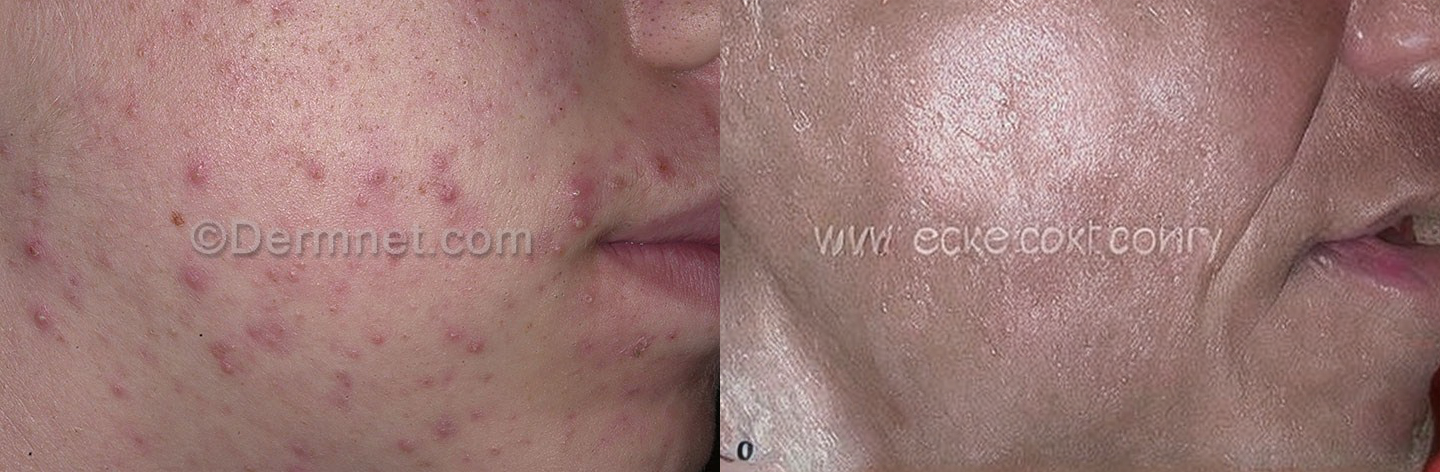

In [11]:
image_path = 'demo1.jpg'
init_image = load_image(image_path)
prompt = "clean acne"
image = pipeline(prompt=prompt, image=init_image, strength=0.7).images[0]
make_image_grid([init_image, image], rows=1, cols=2)

In [26]:
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import load_image, make_image_grid

pipeline = AutoPipelineForImage2Image.from_pretrained(
    "kandinsky-community/kandinsky-2-2-decoder", torch_dtype=torch.float16, use_safetensors=True
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
pipeline.enable_xformers_memory_efficient_attention()

Fetching 13 files:   8%|▊         | 1/13 [00:00<00:05,  2.14it/s]

In [ ]:
image_path = 'demo1.jpg'
init_image = load_image(image_path)
prompt = "cat wizard, gandalf, lord of the rings, detailed, fantasy, cute, adorable, Pixar, Disney, 8k"
image = pipeline(prompt, image=init_image).images[0]
make_image_grid([init_image, image], rows=1, cols=2)